In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.30)

[Text(0.3333333333333333, 0.9285714285714286, 'x[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [35, 32, 38]'),
 Text(0.2222222222222222, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4444444444444444, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.496\nsamples = 70\nvalue = [0, 32, 38]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.139\nsamples = 40\nvalue = [0, 3, 37]'),
 Text(0.5555555555555556, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.4444444444444444, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6666666666666666, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Tex

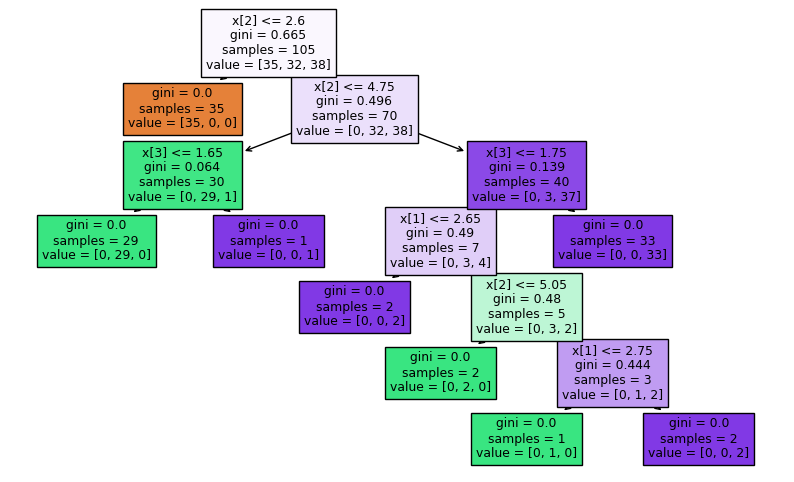

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dclr = DecisionTreeClassifier(random_state=42)
dclr.fit(X_train, y_train)
plt.figure(figsize=(10,6))
tree.plot_tree(dclr,filled= True)

In [16]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

gridparams={
    'max_depth':[2, 3, 5, 6,8,10, 12],
    'criterion':['entropy','gini'],
   'min_samples_leaf': [5, 10, 20, 50, 100]
}
decisionregressor = GridSearchCV(dclr,gridparams,cv=4, n_jobs=-1)
decisionregressor.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 12],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [17]:
decisionregressor.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [18]:
dclr = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dclr.fit(X_train,y_train)
y_pred = dclr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777
